<a href="https://colab.research.google.com/github/Iteba/Data-Science-Practice/blob/main/Multi_Linear_Regression_Practice/Multi_Linear_Regression_Practice.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Read Data

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv('student_performance.csv')

# Exploration

In [ ]:
df.head()

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,Yes,9,1,91.0
1,4,82,No,4,2,65.0
2,8,51,Yes,7,2,45.0
3,5,52,Yes,5,2,36.0
4,7,75,No,8,5,66.0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 6 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Hours Studied                     10000 non-null  int64  
 1   Previous Scores                   10000 non-null  int64  
 2   Extracurricular Activities        10000 non-null  object 
 3   Sleep Hours                       10000 non-null  int64  
 4   Sample Question Papers Practiced  10000 non-null  int64  
 5   Performance Index                 10000 non-null  float64
dtypes: float64(1), int64(4), object(1)
memory usage: 468.9+ KB


In [ ]:
df.describe()

,Hours Studied,Previous Scores,Sleep Hours,Sample Question Papers Practiced,Performance Index
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,4.992900,69.445700,6.530600,4.583300,55.224800
std,2.589309,17.343152,1.695863,2.867348,19.212558
min,1.000000,40.000000,4.000000,0.000000,10.000000
25%,3.000000,54.000000,5.000000,2.000000,40.000000
50%,5.000000,69.000000,7.000000,5.000000,55.000000
75%,7.000000,85.000000,8.000000,7.000000,71.000000
max,9.000000,99.000000,9.000000,9.000000,100.000000


# Preprocessing

## Standardisation

In [ ]:
df['Extracurricular Activities'] = df['Extracurricular Activities'].map({'Yes': 1, 'No': 0})

In [ ]:
df.head(3)

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,1,9,1,91.0
1,4,82,0,4,2,65.0
2,8,51,1,7,2,45.0


## Feature Scaling

In [ ]:
from sklearn.preprocessing import MinMaxScaler

In [ ]:
scaler = MinMaxScaler()

In [ ]:
df[['Hours Studied', 'Previous Scores', 'Sleep Hours', 'Sample Question Papers Practiced', 'Performance Index']] = scaler.fit_transform(df[['Hours Studied', 'Previous Scores', 'Sleep Hours', 'Sample Question Papers Practiced', 'Performance Index']])

In [ ]:
df.head(3)

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,0.750,1.000000,1,1.0,0.111111,0.900000
1,0.375,0.711864,0,0.0,0.222222,0.611111
2,0.875,0.186441,1,0.6,0.222222,0.388889


## General Visualisation

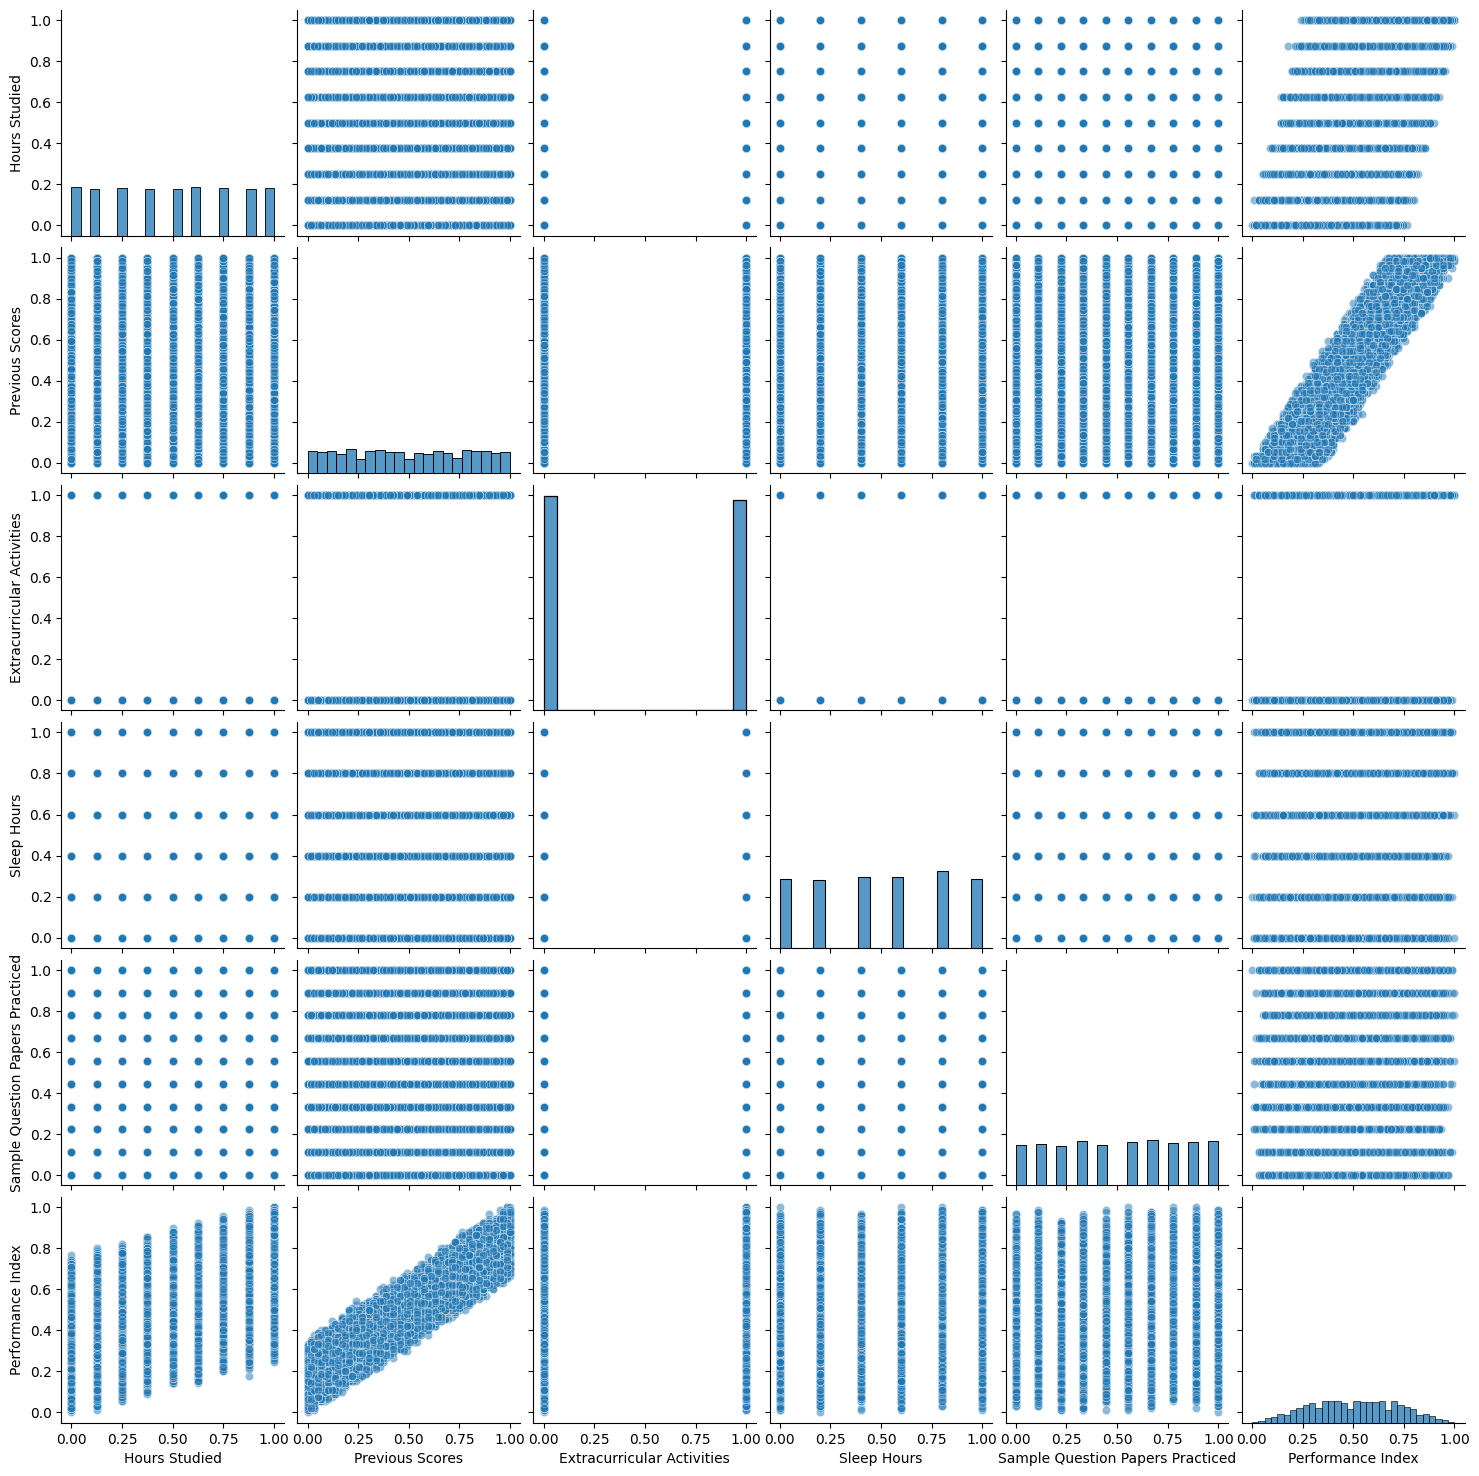

In [ ]:
sns.pairplot(df, kind='scatter', plot_kws={'alpha': 0.3})

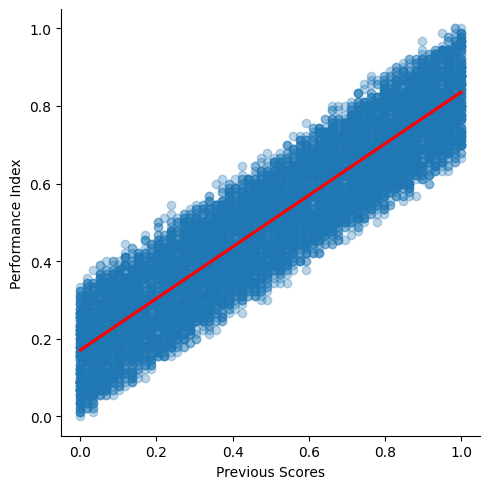

In [ ]:
sns.lmplot(x = 'Previous Scores',
           y = 'Performance Index',
           data = df,
           scatter_kws={'alpha': 0.3},
           line_kws={'color': 'red'}
           )

## Data Split

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X = df.drop('Performance Index', axis=1)
y = df['Performance Index']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model Training

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
model = LinearRegression()

In [ ]:
model.fit(X_train, y_train)

LinearRegression()

# Evaluation

In [ ]:
model.coef_

array([0.25355413, 0.66669226, 0.00676241, 0.02649675, 0.01918314])

In [ ]:
coefficients = pd.DataFrame(model.coef_, X.columns, columns=['Coefficient'])

In [ ]:
coefficients

,Coefficient
Hours Studied,0.253554
Previous Scores,0.666692
Extracurricular Activities,0.006762
Sleep Hours,0.026497
Sample Question Papers Practiced,0.019183


## Predictions

In [ ]:
predictions = model.predict(X_test)

Text(0.5, 1.0, 'Performance vs. Predicted Performance')

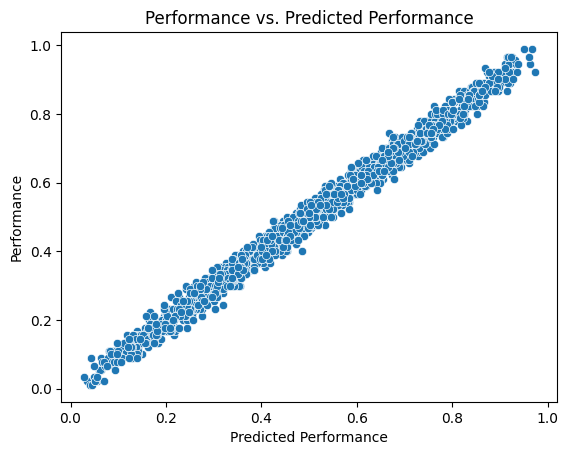

In [ ]:
sns.scatterplot(x = predictions, y = y_test)
plt.xlabel('Predicted Performance')
plt.ylabel('Performance')
plt.title('Performance vs. Predicted Performance')

### Y-test vs Predictions Correlation

Text(0.5, 1.0, 'Performance vs. Predicted Performance')

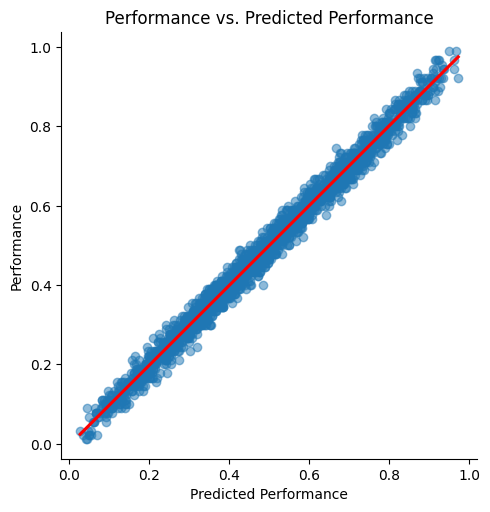

In [ ]:
sns.lmplot(
    x = 'Predicted Performance',
    y = 'Performance',
    data = pd.DataFrame(
        {
            'Predicted Performance': predictions,
            'Performance': y_test
        }
    ),
    scatter_kws={'alpha': 0.5},
    line_kws={'color': 'red'}
)
plt.title('Performance vs. Predicted Performance')

## Error / Cost

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, root_mean_squared_error

In [ ]:
print('Mean Absolute Error: ', mean_absolute_error(y_test, predictions))
print('Mean Squared Error: ', mean_squared_error(y_test, predictions))
print('Root Mean Squared Error: ', root_mean_squared_error(y_test, predictions))

Mean Absolute Error:  0.017901348292358947
Mean Squared Error:  0.0005040281973483773
Root Mean Squared Error:  0.022450572316722293


## Residuals

In [ ]:
residuals = y_test - predictions

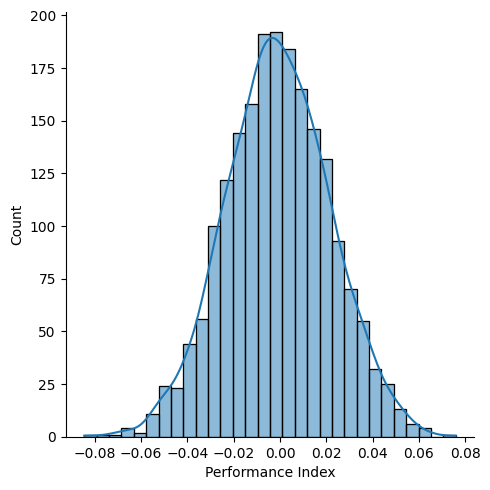

In [ ]:
sns.displot(residuals, bins=30, kde=True)